<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>PDF extraction of text and table data<span class="tocSkip"></span></h1>

**This notebook uses common methods to extract text and tabular data from PDFs**, and should be tried first before more advanced methods are used. The advanced methods are provided in other Notebooks.

Out of the box, the table detection works best where all borders of the table are shown. There are options to set or find borders if they are missing or too feint to be picked up

<h1>Table of Contents<span class="tocSkip"></span></h1>
<ul class="toc-item"><li><span><a href="#Text-extraction-using-pyPDF2" data-toc-modified-id="Text-extraction-using-pyPDF2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text extraction using pyPDF2</a></span></li><li><span><a href="#Text-extraction-using-PyMuPDF" data-toc-modified-id="Text-extraction-using-PyMuPDF-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text extraction using PyMuPDF</a></span></li><li><span><a href="#Table-extraction-using-camelot-py" data-toc-modified-id="Table-extraction-using-camelot-py-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Table extraction using camelot-py</a></span><ul class="toc-item"><li><span><a href="#Simple-table" data-toc-modified-id="Simple-table-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simple table</a></span></li><li><span><a href="#Attempt-to-read-a-table-without-vertical-cell-borders" data-toc-modified-id="Attempt-to-read-a-table-without-vertical-cell-borders-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Attempt to read a table without vertical cell borders</a></span></li></ul></li><li><span><a href="#Text-and-table-extraction-using-pdfplumber" data-toc-modified-id="Text-and-table-extraction-using-pdfplumber-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Text and table extraction using pdfplumber</a></span></li></ul>

**We begin by importing basic libraries for data handling**

In [1]:
import pandas as pd

**Libraries for pdf text / data extraction are imported in their corresponding section.** There are methods for extracting images etc. See the links to the documentation for the corresponding libraries. 

**There is also another library called tabula-py: https://tabula-py.readthedocs.io/en/latest/. This requires Java 8 -- this approach is not recommended for Windows**

# Text extraction using pyPDF2

Documentation: https://pypdf2.readthedocs.io/en/3.0.0/

In [2]:
# Import library
from PyPDF2 import PdfReader

In [3]:
# Read in the PDF
reader = PdfReader('sample_input/fairlend.pdf')

In [4]:
# Number of pages
print(len(reader.pages))

49


**Reading a specific page** 

You can add a loop to read all the pages you care about. It is recommended to look at one / a few representative page(s) to determine the additional text cleaning required.

In [5]:
page_number = 10
page = reader.pages[page_number]
 
# extracting text from page
text = page.extract_text().strip()
print(text)

purposes, examiners should consider the applic ations as if they were made to the 
purchasing institution.  For comparison purposes, applications evaluated under the 
purchased  institution’s standards should not be compared to applications evaluated 
under the purchasing institution’s standards.). 
•	 The portfolio includes purchased loans. If  so, examiners should look for indications 
that the institution specified loans to purchas e based on a prohibited factor or caused a 
prohibited factor to influen ce the origination process. 
•	 A complete decision can be made at one  of the several und erwriting or loan 
processing centers, each with independent author ity.  In such a situation, it is best to 
conduct on-site a separate comparative an alysis at each underwriting center.  If 
covering multiple centers is not feasible during the planned examination, examiners should review their processes and internal  controls to determine whether or not 
expanding the scope and/or length of  

**Depending on the type of text, you may need to further process the text into sentences or paragraphs**

Here is an example of preliminary cleaning of the text data.

In [6]:
sentences = "".join(text.split("\n")).split(".")
processed_sentences = []
for sentence in sentences:
    processed_sentence = sentence.strip().replace("\t","") + "."
    processed_sentences.append(processed_sentence)
    
processed_sentences

['purposes, examiners should consider the applic ations as if they were made to the purchasing institution.',
 'For comparison purposes, applications evaluated under the purchased  institution’s standards should not be compared to applications evaluated under the purchasing institution’s standards.',
 ').',
 '• The portfolio includes purchased loans.',
 'If  so, examiners should look for indications that the institution specified loans to purchas e based on a prohibited factor or caused a prohibited factor to influen ce the origination process.',
 '• A complete decision can be made at one  of the several und erwriting or loan processing centers, each with independent author ity.',
 'In such a situation, it is best to conduct on-site a separate comparative an alysis at each underwriting center.',
 'If covering multiple centers is not feasible during the planned examination, examiners should review their processes and internal  controls to determine whether or not expanding the scope and

For publicly available documents, you could use a language model, e.g. ChatGPT to fix the broken up words in this document. The next example shows how to export this to a text file.

# Text extraction using PyMuPDF

Documentation: https://pymupdf.readthedocs.io/en/latest/module.html

In [7]:
# Import library
import fitz # This uses the PyMuPDF library

In [8]:
doc = fitz.open('sample_input/fairlend.pdf')

In [9]:
# Number of pages
doc.page_count

49

**Get text from document**

We also export the results to text file: sample_output/fairlend.txt

In [10]:
text = ""
out = open("sample_output/fairlend.txt", "wb")  # open text output
for page in doc:
    this_page = page.get_text()
    text += this_page
    
    out.write(this_page.encode("utf8"))  # Get plain text in UTF-8 and write it into the text file
    out.write(bytes((12,)))  # Add a page delimiter
    
print("Completed")

Completed


In [11]:
# Sample of output generated
print(text[3000:4000])

luding extensions of credit to small 
businesses, corporations, partnerships, and trusts. 
The ECOA prohibits discrimination based on: 
•	 Race or color 
•	 Religion 
•	 National origin 
•	 Sex 
•	 Marital status 
•	 Age (provided the applicant has the capacity to contract) 
•	 The applicant’s receipt of income derived from any public assistance program 
•	 The applicant’s exercise, in good faith, of any right under the Consumer Credit 
Protection Act 
The Federal Reserve Board’s Regulation B, found at 12 CFR part 202, implements the ECOA. 
Regulation B describes lending acts and practices that are specifically prohibited, permitted, or 
required. Official staff interpretations of the regulation are found in Supplement I to 12 CFR part 
202. 
The Fair Housing Act (FHAct) prohibits discrimination in all aspects of "residential real-estate 
related transactions," including but not limited to: 
•	 Making loans to buy, build, repair or improve a dwelling  
•	 Purchasing real estate loans 


# Table extraction using camelot-py

Documentation: https://camelot-py.readthedocs.io/en/master/

camelot identifies and extracts all tables it can find. It does better with clearly formatted tables in the PDF. Camelot requires the use of ghostscript: https://ghostscript.com/releases/gsdnld.html. You should install the 64bit one.

You need to make sure to add the Path to the user environment paths. If you are installed version 10.00.0, the path is "C:\Program Files\gs\gs10.00.0\bin"

In [12]:
# Import the library
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import camelot
import ctypes
from ctypes.util import find_library
find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll")))

'C:\\Program Files\\gs\\gs10.00.0\\bin\\gsdll64.dll'

**If you have set up ghostscript correctly, the above cell will output the path to the 'gsdll' file**

By default, camelot will only read the first page, so you need to specify pages (or select all): https://camelot-py.readthedocs.io/en/master/user/quickstart.html#specify-page-numbers

## Simple table

In [13]:
# Import the tables
tables = camelot.read_pdf('sample_input/simple_table.pdf', pages='1')

In [14]:
# Found 1 table
tables

<TableList n=1>

In [15]:
# Look at the extracted table
tables[0].df

,0,1,2,3,4,5
0,Disability \nCategory,Participants,Ballots \nCompleted,Ballots \nIncomplete/ \nTerminated,Results,
1,,,,,Accuracy,Time to \ncomplete
2,Blind,5,1,4,"34.5%, n=1","1199 sec, n=1"
3,Low Vision,5,2,3,"98.3% n=2 \n(97.7%, n=3)","1716 sec, n=3 \n(1934 sec, n=2)"
4,Dexterity,5,4,1,"98.3%, n=4","1672.1 sec, n=4"
5,Mobility,3,3,0,"95.4%, n=3","1416 sec, n=3"


**This table is in good enough shape to be processed**

**We should check to make sure the entire table on the page was extracted**

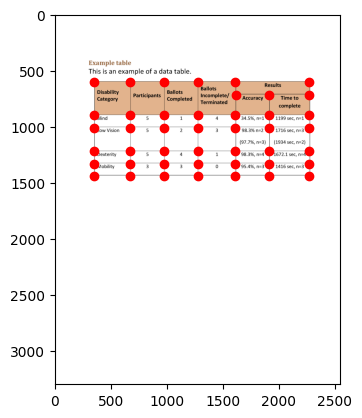

In [18]:
# Show the items of the table found
found_table = camelot.plot(tables[0], kind='joint')

## Attempt to read a table without vertical cell borders

Automatic detection of the table often fails when cell borders are missing or feint.

In [19]:
# Import the tables from two pages
tables = camelot.read_pdf('sample_input/stress_test_scenarios.pdf', pages='21,22')

In [20]:
# 2 tables are identified
tables

<TableList n=2>

**Let's take a closer look at the second table (index = 1)**

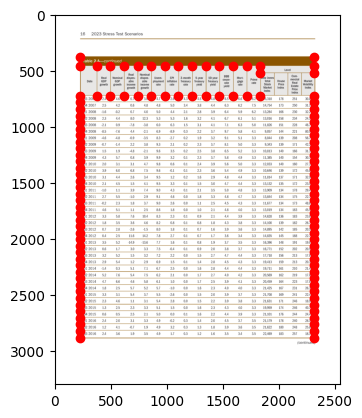

In [21]:
# Show the items of the table found
found_table = camelot.plot(tables[1], kind='joint')

In [ ]:
# See the Data
tables[1].df.head()

**It seems to have found most of the headings, but failed to find the body. We can confirm this by looking at the output data**

Let's attempt to fix the headings for the page 22 table, by tweaking a parameter (read more at the advanced options: https://camelot-py.readthedocs.io/en/master/user/advanced.html#detect-short-lines)

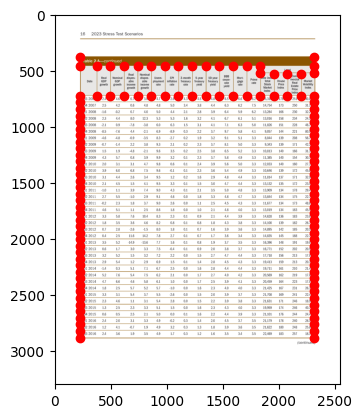

In [130]:
tables = camelot.read_pdf('sample_input/stress_test_scenarios.pdf', pages='22', line_scale=40)
# Show the items of the table found
found_table = camelot.plot(tables[0], kind='joint')

**We are now capturing all the headers, so we can use those positions to manually specify the column separators**

Using the column locations, we can infer the 'position' of the vertical columns.

In [121]:
cols = tables[0].cols
cols

[(54.41999999999956, 89.75999999999999),
 (89.75999999999999, 118.8),
 (118.8, 148.07999999999998),
 (148.07999999999998, 177.35999999999999),
 (177.35999999999999, 206.4),
 (206.4, 235.67999999999998),
 (235.67999999999998, 264.71999999999997),
 (264.71999999999997, 294.0),
 (294.0, 323.28),
 (323.28, 352.32),
 (352.32, 381.59999999999997),
 (381.59999999999997, 410.64),
 (410.64, 439.91999999999996),
 (439.91999999999996, 469.2),
 (469.2, 498.24),
 (498.24, 527.52),
 (527.52, 556.4399999999999)]

**From the above, we can create and apply the column separators to the table (on page 22)**
You could also do this via trial and error

In [122]:
column_locations = [cols[0][0]]
for col in cols:
    column_locations.append(col[1])

# Found column locations
column_locations

[54.41999999999956,
 89.75999999999999,
 118.8,
 148.07999999999998,
 177.35999999999999,
 206.4,
 235.67999999999998,
 264.71999999999997,
 294.0,
 323.28,
 352.32,
 381.59999999999997,
 410.64,
 439.91999999999996,
 469.2,
 498.24,
 527.52,
 556.4399999999999]

In [123]:
new_tables = camelot.read_pdf('sample_input/stress_test_scenarios.pdf', pages = '22', 
                          flavor='stream', # Needed when looking for specific column locations
                          columns = [",".join(map(str, column_locations))])

In [124]:
# Found 1 table
new_tables

<TableList n=1>

In [125]:
new_tables[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,,Table 2.A—continued,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,Level,,,
2,,,,,Real,Nominal,,,,,,,,,,,,,
3,,,,,,,,,,,,BBB,,,,,Com-,,
4,,,Real,Nominal,dispos-,dispos-,Unem-,CPI,3-month,5-year,10-year,,Mort-,,Dow Jones,,,,
5,,,,,,,,,,,,corpo-,,Prime,,,mercial,,
6,,Date,GDP,GDP,able,able,ployment,inflation,Treasury,Treasury,Treasury,,gage,,Total,House,,Market,
7,,,,,,,,,,,,rate,,rate,,,Real,,
8,,,growth,growth,income,income,rate,rate,rate,yield,yield,,rate,,Stock,Price,,Volatility,
9,,,,,,,,,,,,yield,,,,,Estate,,


**Here we found the cells, but the table headers are now split by line break**

So we can combine the results of old and new tables. 

Note: There are ways to change tolerance on the rows to avoid splitting headers with line break, but it can cause issues with detecting the rows containing the data. Section 4 using pdfplumber provides much greater control with how rows and columns can be identified.

In [135]:
combined_table = pd.concat([tables[0].df.loc[1:2], new_tables[0].df.loc[14:]])
combined_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,Date,Real\nGDP\ngrowth,Nominal\nGDP\ngrowth,Real\ndispos-\nable\nincome\ngrowth,Nominal\ndispos-\nable\nincome\ngrowth,Unem-\nployment\nrate,CPI\ninflation\nrate,3-month\nTreasury\nrate,5-year\nTreasury\nyield,10-year\nTreasury\nyield,BBB\ncorpo-\nrate\nyield,Mort-\ngage\nrate,Prime\nrate,Level,,,,NaN,NaN
2,,,,,,,,,,,,,,Dow Jones\nTotal\nStock\nMarket\nIndex,House\nPrice\nIndex,Com-\nmercial\nReal\nEstate\nPrice\nIndex,Market\nVolatility\nIndex,NaN,NaN
14,,Q3 2007,2.4,4.6,0.7,3.0,4.7,2.6,4.3,4.5,4.8,6.5,6.6,8.2,"15,318",178,251,30.8,
15,,Q4 2007,2.5,4.2,0.6,4.8,4.8,5.0,3.4,3.8,4.4,6.3,6.2,7.5,"14,754",173,250,31.1,
16,,Q1 2008,-1.6,-0.2,0.7,4.0,5.0,4.4,2.1,2.8,3.9,6.4,5.9,6.2,"13,284",166,230,32.2,
17,,Q2 2008,2.3,4.4,8.0,12.3,5.3,5.3,1.6,3.2,4.1,6.7,6.1,5.1,"13,016",158,234,24.1,
18,,Q3 2008,-2.1,0.9,-7.8,-3.8,6.0,6.3,1.5,3.1,4.1,7.1,6.3,5.0,"11,826",151,228,46.7,
19,,Q4 2008,-8.5,-7.6,4.4,-2.1,6.9,-8.9,0.3,2.2,3.7,9.7,5.8,4.1,"9,057",144,221,80.9,
20,,Q1 2009,-4.6,-4.8,-0.9,-3.5,8.3,-2.7,0.2,1.9,3.2,9.1,5.1,3.3,"8,044",139,208,56.7,
21,,Q2 2009,-0.7,-1.4,2.2,3.8,9.3,2.1,0.2,2.3,3.7,8.1,5.0,3.3,"9,343",139,171,42.3,


**We are now largely there, and just need a few more simple cleaning steps (not shown here)**

**In case there are multiple tables on page 22, we could restrict the location to this particular table found by setting the table_regions or table_areas argument**

The region of the table previously found can be located using the _bbox attribute of the table object

# Text and table extraction using pdfplumber

Documentation: https://pypi.org/project/pdfplumber/

pdfplumber is also what is used in the advanced PDF text and table extraction (in a separate Notebook). Here we make use of the simpler functionality of pdfplumber

In [136]:
import pdfplumber

In [137]:
# Load in the pdf file
pdf = pdfplumber.open("sample_input/stress_test_scenarios.pdf")

**We will first extract text on page 2 (index = 1)**

In [138]:
page = pdf.pages[1]
page.extract_text()

'The Federal Reserve System is the central\nbank of the United States. It performs five key\nfunctions to promote the effective operation\nof the U.S. economy and, more generally, the\npublic interest.\nThe Federal Reserve\n■ conducts the nation’s monetary policyto promote maximum employment\nand stable prices in the U.S. economy;\n■ promotes the stability of the financial systemand seeks to minimize\nand contain systemic risks through active monitoring and engagement in\nthe U.S. and abroad;\n■ promotes the safety and soundness of individual financial institutions\nand monitors their impact on the financial system as a whole;\n■ fosters payment and settlement system safety and efficiencythrough\nservices to the banking industry and U.S. government that facilitate\nU.S.-dollar transactions and payments; and\n■ promotes consumer protection and community developmentthrough\nconsumer-focused supervision and examination, research and analysis of\nemerging consumer issues and trends, commun

**We then extract table on page 22 (index = 21)**

First, we can see a preview how the settings would extract data from the table. 

On a windows machine, you would need additional pre-requisities: 
- https://docs.wand-py.org/en/latest/guide/install.html#install-imagemagick-on-windows
- https://ghostscript.com/releases/gsdnld.html

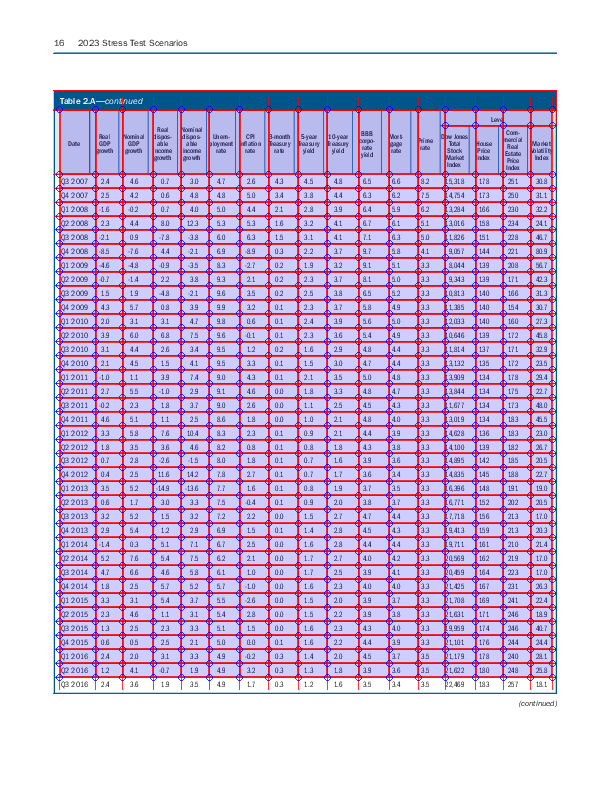

In [151]:
im = page.to_image()   # For debugging only. This requires additional programs to be installed
display(im.debug_tablefinder({"vertical_strategy": "text", "horizontal_strategy": "lines"}))

**It is missing the last row of the table**

We can try adding the following argument to allow for near intersections (last row vs. bottom border)
"intersection_tolerance": 5

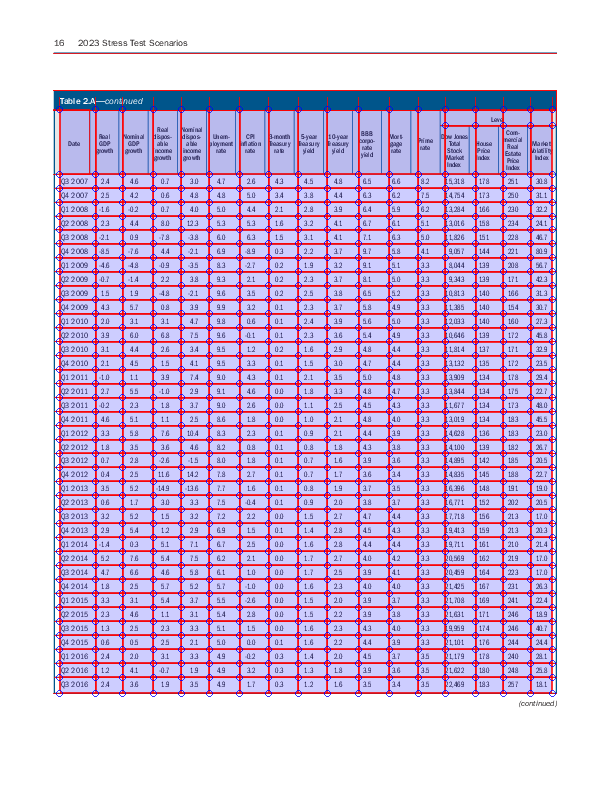

In [154]:
im = page.to_image()   # For debugging only. This requires additional programs to be installed
display(im.debug_tablefinder({"vertical_strategy": "text", "horizontal_strategy": "lines", "intersection_tolerance": 5}))

**We now capture the full table**

In [155]:
page = pdf.pages[21]
table = page.extract_table(table_settings={"vertical_strategy": "text", "horizontal_strategy": "lines", "intersection_tolerance": 5})

In [156]:
pd.DataFrame(table)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Date,RealGDPgrowth,NominalGDPgrowth,Realdispos-ableincomegrowth,Nominaldispos-ableincomegrowth,Unem-ploymentrate,CPI\ninflationrate,3-monthTreasuryrate,5-yearTreasuryyield,10-yearTreasuryyield,BBBcorpo-rateyield,Mort-gagerate,D\nPrimerate,,Leve,l,
1,None,None,None,None,None,None,None,None,None,None,None,None,None,ow JonesTotalStockMarketIndex,HousePriceIndex,Com-mercialRealEstatePriceIndex,MarketVolatilityIndex
2,Q3 2007,2.4,4.6,0.7,3.0,4.7,2.6,4.3,4.5,4.8,6.5,6.6,8.2,"15,318",178,251,30.8
3,Q4 2007,2.5,4.2,0.6,4.8,4.8,5.0,3.4,3.8,4.4,6.3,6.2,7.5,"14,754",173,250,31.1
4,Q1 2008,-1.6,-0.2,0.7,4.0,5.0,4.4,2.1,2.8,3.9,6.4,5.9,6.2,"13,284",166,230,32.2
5,Q2 2008,2.3,4.4,8.0,12.3,5.3,5.3,1.6,3.2,4.1,6.7,6.1,5.1,"13,016",158,234,24.1
6,Q3 2008,-2.1,0.9,-7.8,-3.8,6.0,6.3,1.5,3.1,4.1,7.1,6.3,5.0,"11,826",151,228,46.7
7,Q4 2008,-8.5,-7.6,4.4,-2.1,6.9,-8.9,0.3,2.2,3.7,9.7,5.8,4.1,"9,057",144,221,80.9
8,Q1 2009,-4.6,-4.8,-0.9,-3.5,8.3,-2.7,0.2,1.9,3.2,9.1,5.1,3.3,"8,044",139,208,56.7
9,Q2 2009,-0.7,-1.4,2.2,3.8,9.3,2.1,0.2,2.3,3.7,8.1,5.0,3.3,"9,343",139,171,42.3


**In a few quick step, we do a much better job extracting the table**

## Setting explicit splits when column borders are not clear

In some PDFs, the row and column borders are not very clear (e.g. just various shadings of color, rather than lines. In these cases, one can either:
- Use the presence of text to identify borders 
- Use coordinates to specify the borders 

Using text to identify borders is great for rows, but situational for columns (depending on whether the text is left aligned and only 1 row). The below provides a few examples.

In [18]:
import pdfplumber
import pandas as pd
# Load in the pdf file
pdf = pdfplumber.open("sample_input/finsup3q2021.pdf")

**We read in the table on the second page**

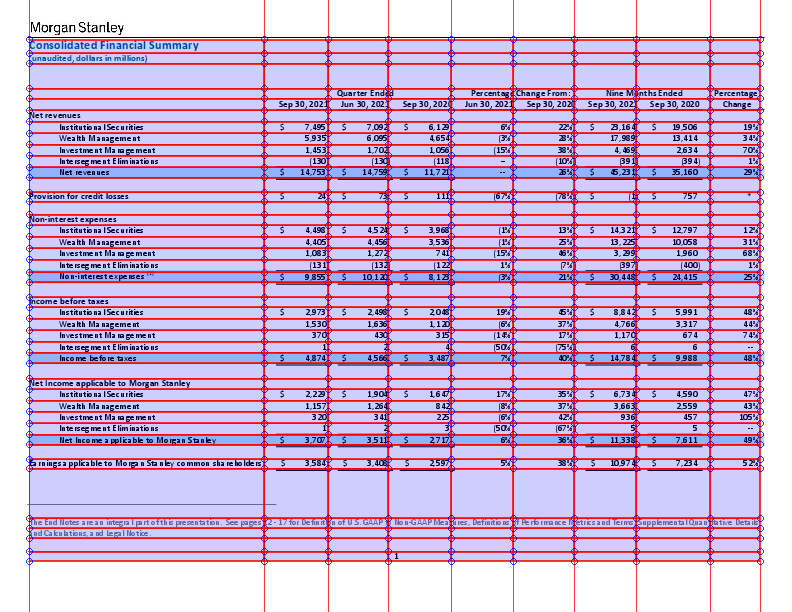

In [27]:
page = pdf.pages[1]
im = page.to_image()

display(im.debug_tablefinder({"vertical_strategy": "explicit", 
                              "horizontal_strategy": "text", 
                              "intersection_tolerance": 5, 
                              "explicit_vertical_lines": [29,264,328,388, 451, 513, 574, 636, 710, 760], 
                              "snap_tolerance": 4}))

In [32]:
# Put it into a dataframe
this_table = page.extract_table({"vertical_strategy": "explicit", 
                                      "horizontal_strategy": "text", 
                                      "intersection_tolerance": 5, 
                                      "explicit_vertical_lines": [29,264,329,389, 452, 516, 576, 638, 710, 760], 
                                      "snap_tolerance": 4})

pd.DataFrame(this_table).loc[4:36]

,0,1,2,3,4,5,6,7,8
4,,"Sep 30, 2021","Jun 30, 2021","Sep 30, 2020","Jun 30, 2021","Sep 30, 2020","Sep 30, 2021","Sep 30, 2020",Change
5,Net revenues,,,,,,,,
6,Institutional Securities,"$ 7,495","$ 7,092","$ 6,129",6%,22%,"$ 23,164","$ 19,506",19%
7,Wealth Management,"5,935","6,095","4,654",(3%),28%,"17,989","13,414",34%
8,Investment Management,"1,453","1,702","1,056",(15%),38%,"4,469","2,634",70%
9,Intersegment Eliminations,(130),(130,) (118),‐‐,(10%),(391),(394),1%
10,Net revenues,"$ 14,753","$ 14,759","$ 11,721",‐‐,26%,"$ 45,231","$ 35,160",29%
11,,,,,,,,,
12,Provision for credit losses,$ 24,$ 73,$ 111,(67%),(78%),$ (1),$ 757,*
13,,,,,,,,,


**For a more dynamic approach of identifying the vertical splits, we can create a function that identifies words that show up in the heading**

In [83]:
### Define a function which finds the vertical coordinates which split each column ###

def find_splits(page, 
                buffer = 10,  # Start split this many pixels to the left of the found word
                starting_words = ["Mar 31,", "Jun 30,", "Sep 30,", "Dec 31,", "Change"], # Words that the headers may start with 
                starting_after = 100, # Do not search for these words prior to this x-position of the page (i.e. don't look in row headers)
                find_first = True): # Find the first row that contains all of these starting words
    row_buffer = 1
    
    words = page.extract_words()

    starting_words_splits = set()
    left_most = 999999
    right_most = 0
    
    current_row = 0
    this_row_text = []
    this_row_word_position = []
    candidate_row = None
    candidate_row_text = []
    
    # Find permutations of starting words
    for word in words:
        left = word['x0']
        right = word['x1']
        top = word['top']

        if top > current_row + row_buffer:
            current_row=top
            this_row_text = []
        
        if left < left_most:
            left_most = left
        if right > right_most:
            right_most = right

        this_row_text.append(word['text'])
        this_row_word_position.append(left)

        if prior_word_left > starting_after:
            
            for starting_word in starting_words:
                
                starting_word_length = len(starting_word.split(" "))
                
                if len(this_row_text) < starting_word_length:
                    continue
                
                if " ".join(this_row_text[(-1*starting_word_length):]) == starting_word:
                    
                    if find_first:
                        if candidate_row:
                            # Check if this is a new row
                            if abs(candidate_row - current_row) >= row_buffer:
                                # Then check if the candidate row found so far contains all of the words
                                all_found = True
                                for needed_word in starting_words:
                                    if needed_word not in " ".join(candidate_row_text):
                                        all_found = False

                                # If all are not found in this row, consider this row not a candidate row
                                if not all_found: 
                                    candidate_row = None
                                    candidate_row_text = []
                                    starting_words_splits = set()

                        if candidate_row is None:
                            candidate_row = current_row
                            starting_words_splits.add(this_row_word_position[-1*starting_word_length] - buffer)
                            candidate_row_text = this_row_text
                        elif abs(candidate_row - current_row) < row_buffer: # If within the same row
                            starting_words_splits.add(this_row_word_position[-1*starting_word_length] - buffer)
                            candidate_row_text = this_row_text
                        else:
                            pass
                        
                    else:
                        starting_words_splits.add(this_row_word_position[-1*starting_word_length] - buffer)
                            
        
        prior_word_left = left
    
    starting_words_splits = list(starting_words_splits)
    if len(starting_words_splits) == 0:
        starting_words_splits = []
    else:
        starting_words_splits.sort()

    vertical_splits = [left_most] + starting_words_splits + [right_most]
    return vertical_splits

In [84]:
page = pdf.pages[1]

vertical_splits = find_splits(page, 
                              starting_words = ["Jun 30,", "Sep 30,", "Change"], # Words that the headers may start with 
                              find_first = True)
vertical_splits

[28.911348700000076,
 268.8793856600001,
 331.2485650000001,
 392.6861476600001,
 455.08906692000005,
 516.52664958,
 578.44690054,
 640.3671515,
 712.74958932,
 759.7903981599999]

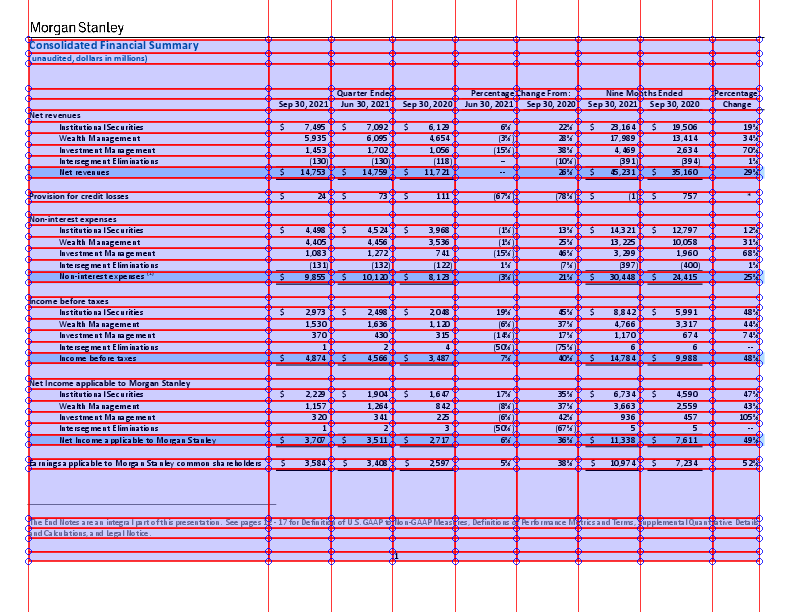

In [85]:
im = page.to_image()

display(im.debug_tablefinder({"vertical_strategy": "explicit", 
                              "horizontal_strategy": "text", 
                              "intersection_tolerance": 5, 
                              "explicit_vertical_lines": vertical_splits, 
                              "snap_tolerance": 4}))